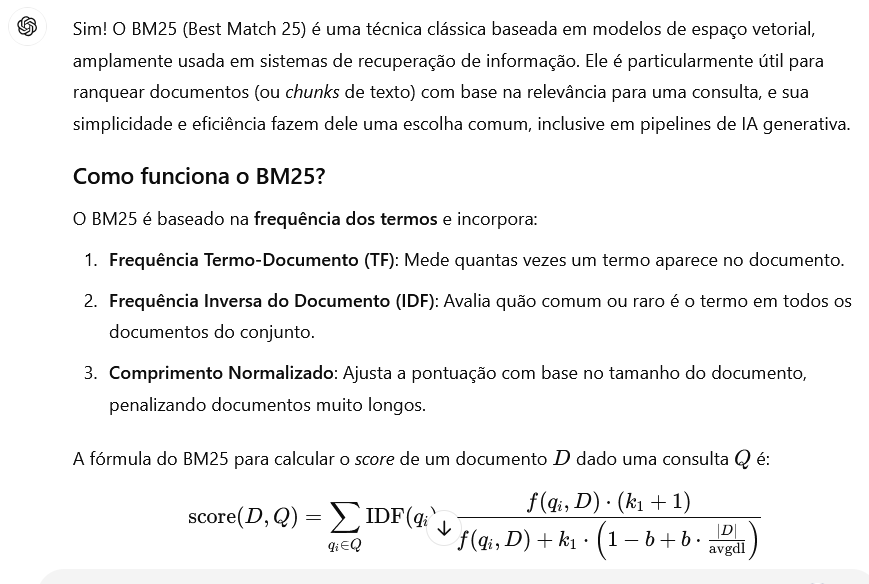

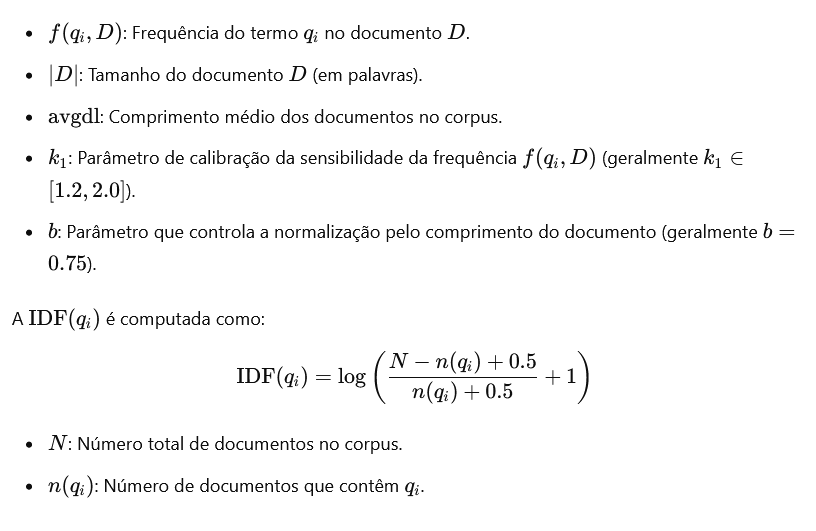

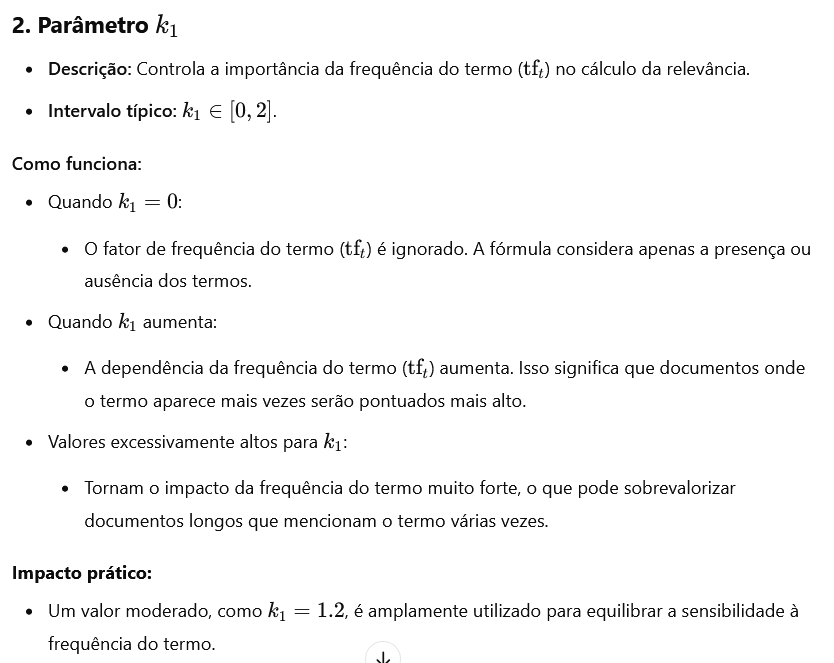

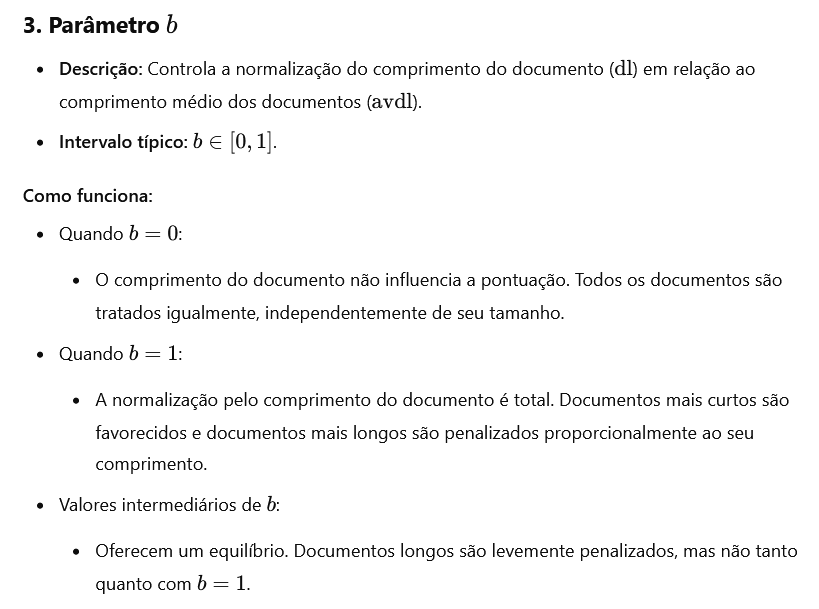

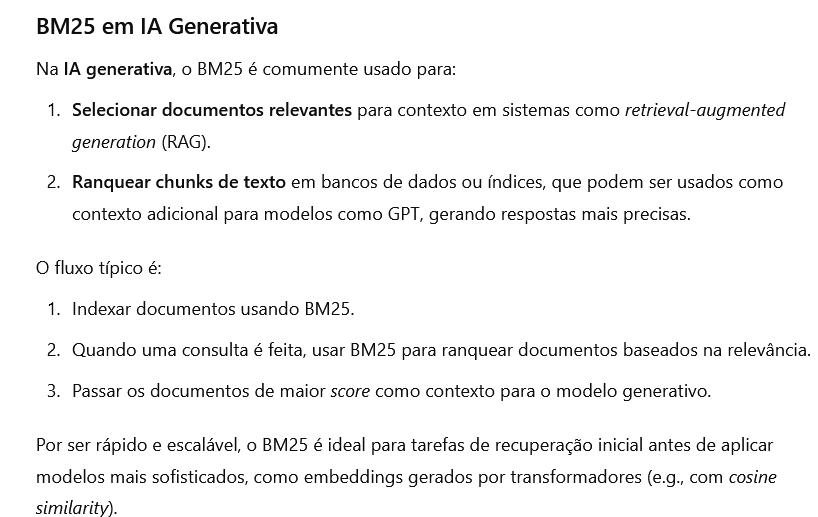

In [6]:
from rank_bm25 import BM25Okapi
from nltk.tokenize import word_tokenize
import nltk

In [9]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [11]:
corpus = [
    "O aprendizado de máquina é uma área fascinante da ciência de dados.",
    "A recuperação de informação é útil para IA generativa.",
    "O BM25 é uma técnica popular em mecanismos de busca.",
    "Python é amplamente usado em aprendizado de máquina e ciência de dados.",
    "Mecanismos de busca como o Google são baseados em recuperação de informação."
]

In [16]:
# Pré-processar os documentos: tokenização
tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]
print(tokenized_corpus)

[['o', 'aprendizado', 'de', 'máquina', 'é', 'uma', 'área', 'fascinante', 'da', 'ciência', 'de', 'dados', '.'], ['a', 'recuperação', 'de', 'informação', 'é', 'útil', 'para', 'ia', 'generativa', '.'], ['o', 'bm25', 'é', 'uma', 'técnica', 'popular', 'em', 'mecanismos', 'de', 'busca', '.'], ['python', 'é', 'amplamente', 'usado', 'em', 'aprendizado', 'de', 'máquina', 'e', 'ciência', 'de', 'dados', '.'], ['mecanismos', 'de', 'busca', 'como', 'o', 'google', 'são', 'baseados', 'em', 'recuperação', 'de', 'informação', '.']]


In [19]:
# Criar o modelo BM25
#bm25 = BM25Okapi(tokenized_corpus)
bm25 = BM25Okapi(tokenized_corpus, k1=1.5, b=0.75)

In [ ]:
# Consulta de exemplo
query = "ciência de dados e aprendizado"
tokenized_query = word_tokenize(query.lower())
print(tokenized_query)


['ciência', 'de', 'dados', 'e', 'aprendizado']

In [17]:
# Recuperar scores para os documentos
scores = bm25.get_scores(tokenized_query)
print(scores)

# Ordenar os documentos pela relevância
ranked_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
print(ranked_indices)

[1.15564098 0.14196999 0.1364387  2.21454439 0.18270921]
[3, 0, 4, 1, 2]


In [18]:
# Exibir os resultados
print("Consulta:", query)
print("\nResultados ranqueados:")
for idx in ranked_indices:
    print(f"Documento {idx + 1} (Score: {scores[idx]:.2f}): {corpus[idx]}")

Consulta: ciência de dados e aprendizado

Resultados ranqueados:
Documento 4 (Score: 2.21): Python é amplamente usado em aprendizado de máquina e ciência de dados.
Documento 1 (Score: 1.16): O aprendizado de máquina é uma área fascinante da ciência de dados.
Documento 5 (Score: 0.18): Mecanismos de busca como o Google são baseados em recuperação de informação.
Documento 2 (Score: 0.14): A recuperação de informação é útil para IA generativa.
Documento 3 (Score: 0.14): O BM25 é uma técnica popular em mecanismos de busca.
